In [81]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# Read input data
weather_frame = pd.read_csv(
    "../data/terminwerte_TU_00183_akt/produkt_tu_termin_20240413_20251014_00183.txt", sep=";")
weather_frame.head()

,STATIONS_ID,MESS_DATUM,QN_4,TT_TER,RF_TER,eor
0,183,2024041306,9,9.9,90.0,eor
1,183,2024041312,9,14.0,82.0,eor
2,183,2024041318,9,12.1,85.0,eor
3,183,2024041406,9,9.0,78.0,eor
4,183,2024041412,9,10.6,69.0,eor


### Transformation

In [83]:
# Data transformation
# Rename columns, drop unused columns
weather_frame = weather_frame.drop(['STATIONS_ID', 'eor'], axis=1)
weather_frame = weather_frame.rename(columns={
    'MESS_DATUM': 'datetime',
    'QN_4': 'quality',
    'TT_TER': 'temp_C',
    'RF_TER': 'rel_humidity_pct'
})

# Convert datetime into a format that pandas understands and mathplotlib can plot
weather_frame['datetime'] = pd.to_datetime(weather_frame['datetime'], format='%Y%m%d%H')
weather_frame = weather_frame.set_index('datetime')

weather_frame.head()

,quality,temp_C,rel_humidity_pct
datetime,,,
2024-04-13 06:00:00,9,9.9,90.0
2024-04-13 12:00:00,9,14.0,82.0
2024-04-13 18:00:00,9,12.1,85.0
2024-04-14 06:00:00,9,9.0,78.0
2024-04-14 12:00:00,9,10.6,69.0


# Temperature

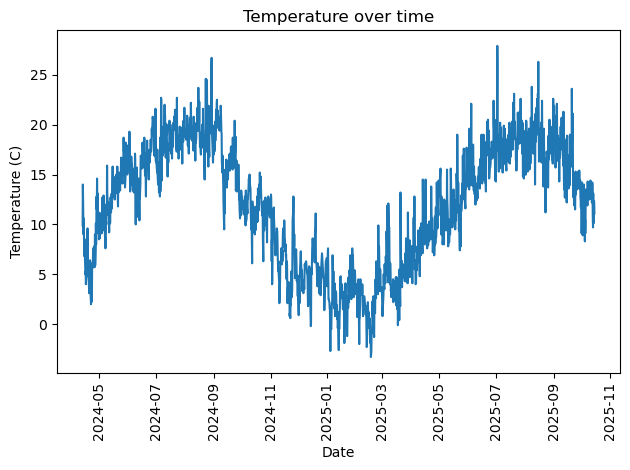

In [84]:
# Plot a time series with temperature
plt.plot(weather_frame['temp_C'])
plt.title("Temperature over time")
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

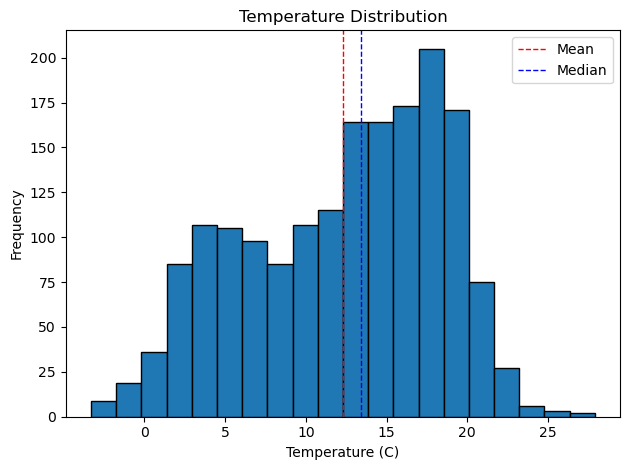

In [85]:
# Plot a histogram with temperature
# show me median and mean in the histogram
plt.hist(weather_frame['temp_C'], bins=20, edgecolor='black')
plt.axvline(weather_frame['temp_C'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(weather_frame['temp_C'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (C)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

### Humidity

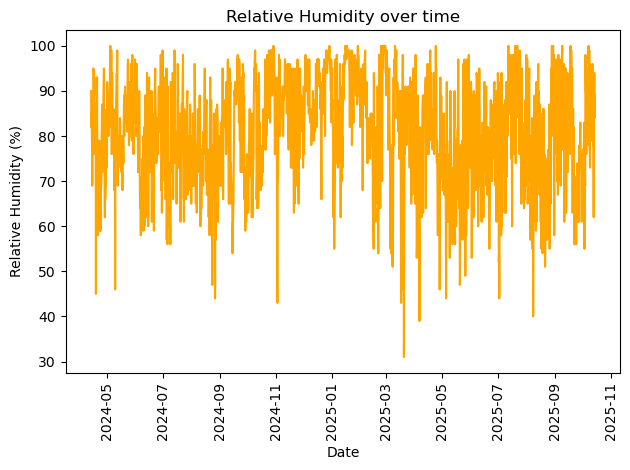

In [86]:
# Plot a time series with relative humidity
plt.plot(weather_frame['rel_humidity_pct'], color='orange')
plt.title("Relative Humidity over time")
plt.xlabel("Date")
plt.ylabel("Relative Humidity (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

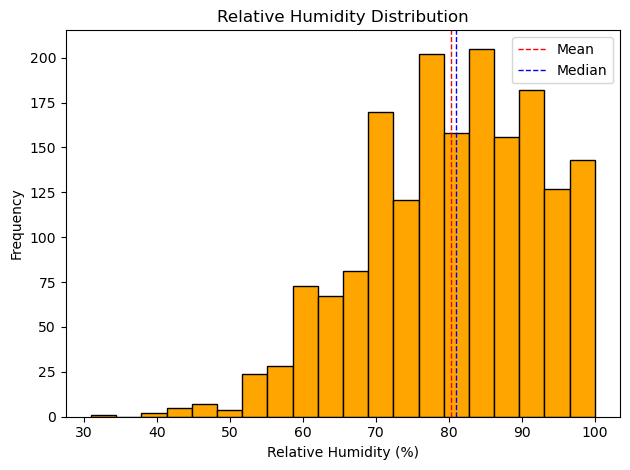

In [87]:
# Plot a histogram with relative humidity
# show me median and mean in the histogram
plt.hist(weather_frame['rel_humidity_pct'], bins=20, edgecolor='black', color='orange')
plt.axvline(weather_frame['rel_humidity_pct'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(weather_frame['rel_humidity_pct'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.title("Relative Humidity Distribution")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [88]:
# Print me mean and median of relative humidity
mean_humidity = weather_frame['rel_humidity_pct'].mean()
median_humidity = weather_frame['rel_humidity_pct'].median()
print(f"Mean Relative Humidity: {mean_humidity:.2f}%")
print(f"Median Relative Humidity: {median_humidity:.2f}%")

Mean Relative Humidity: 80.34%
Median Relative Humidity: 81.00%


In [89]:
# Can you find a correlation between temperature and humidity?
correlation = weather_frame['temp_C'].corr(weather_frame['rel_humidity_pct'])
print(f"Correlation between Temperature and Relative Humidity: {correlation:.2f}")

Correlation between Temperature and Relative Humidity: -0.26


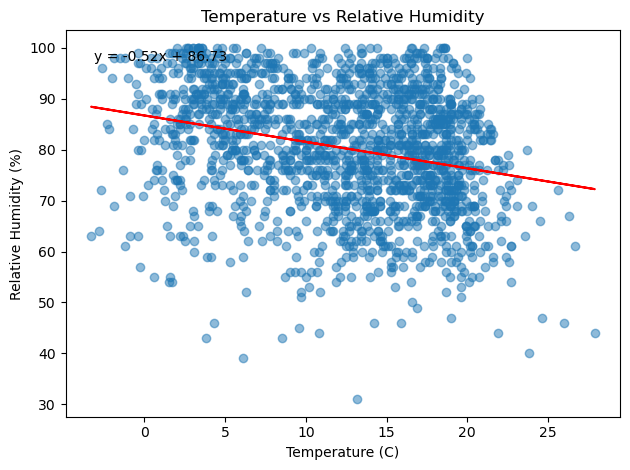

In [90]:
# Can you visualize the correlation between temperature and humidity, please show
# a regression line with regression term printed above the line
plt.scatter(weather_frame['temp_C'], weather_frame['rel_humidity_pct'], alpha=0.5)
# Fit a linear regression line
m, b = np.polyfit(weather_frame['temp_C'], weather_frame['rel_humidity_pct'], 1)
plt.plot(weather_frame['temp_C'], m*weather_frame['temp_C'] + b, color='red')
plt.title("Temperature vs Relative Humidity")
plt.xlabel("Temperature (C)")
plt.ylabel("Relative Humidity (%)")
plt.text(0.05, 0.95, f'y = {m:.2f}x + {b:.2f}', transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top')
plt.tight_layout()
plt.show()